In [35]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 20, 6

In [31]:
img = cv2.imread("/home/msmith/kaggle/whale/imgs/whale_00195/head_2753.jpg")
h,w,c = img.shape

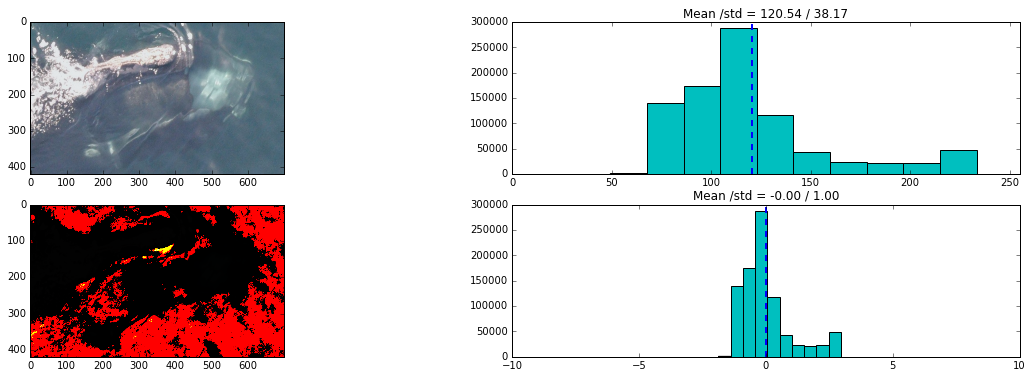

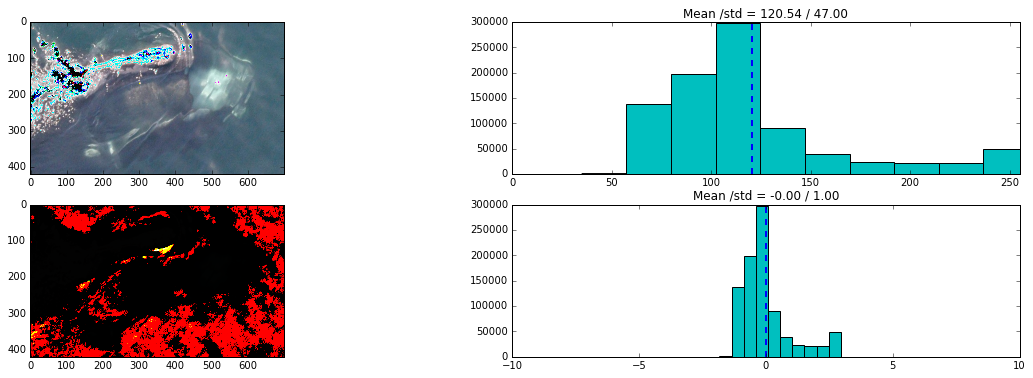

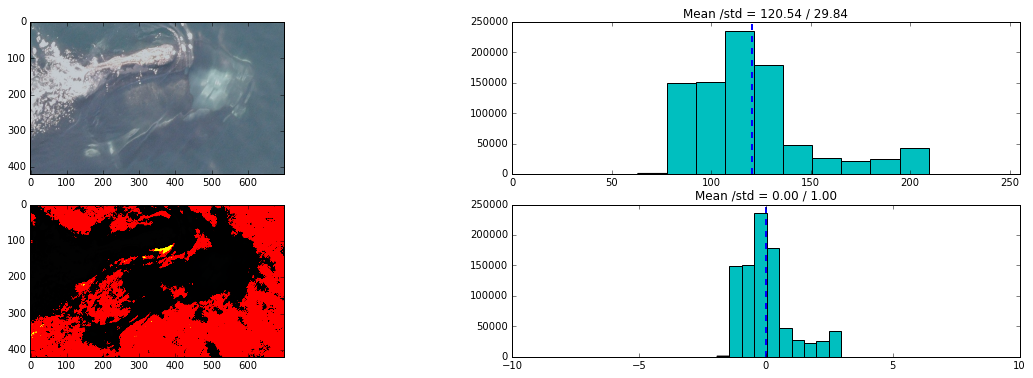

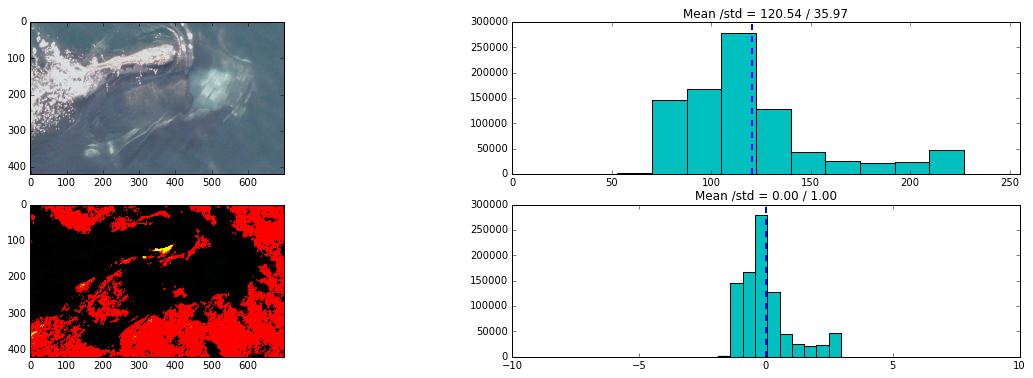

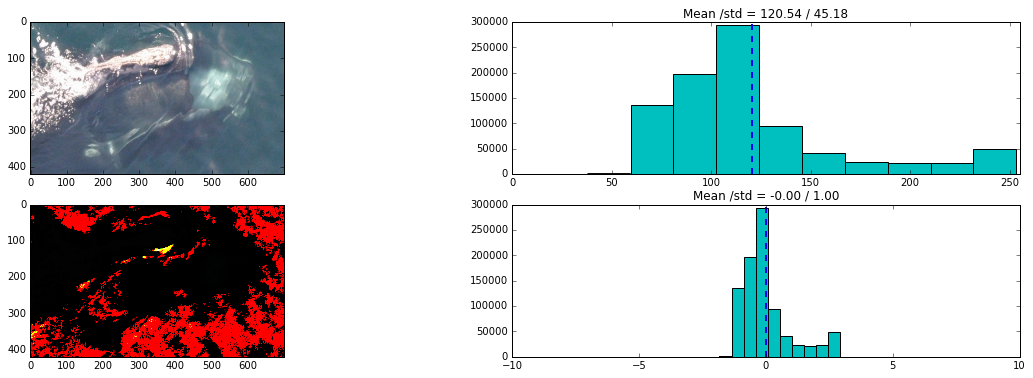

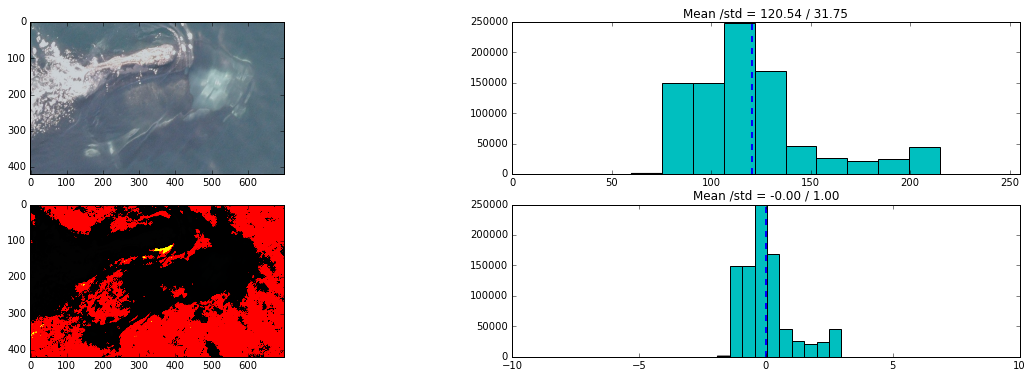

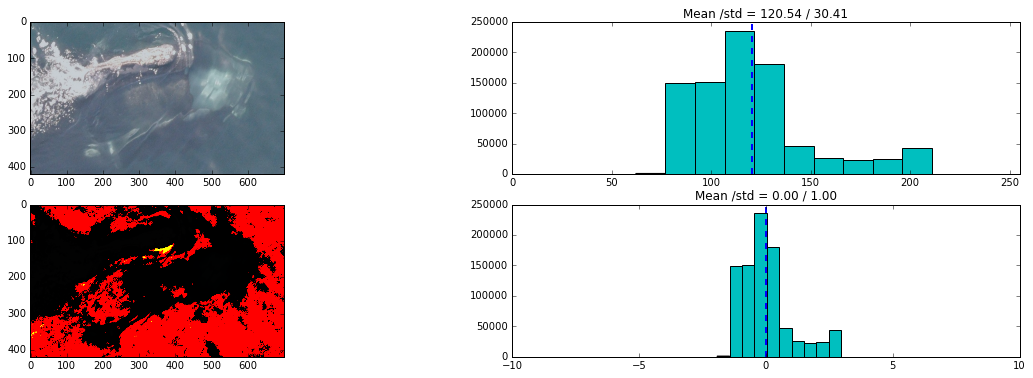

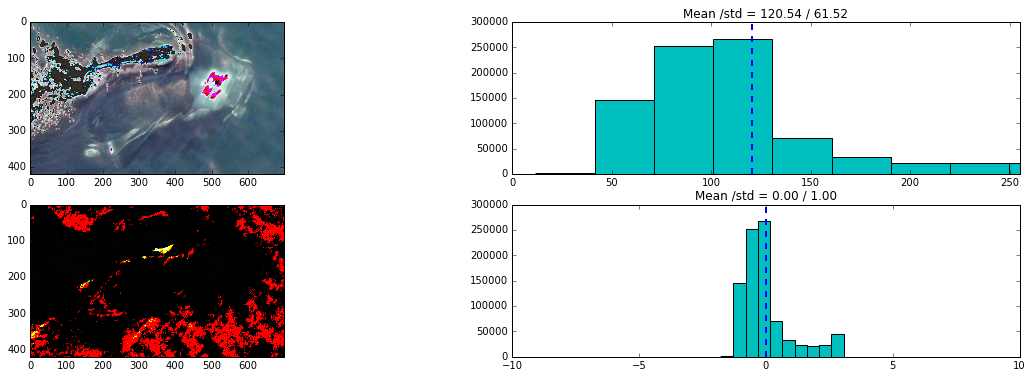

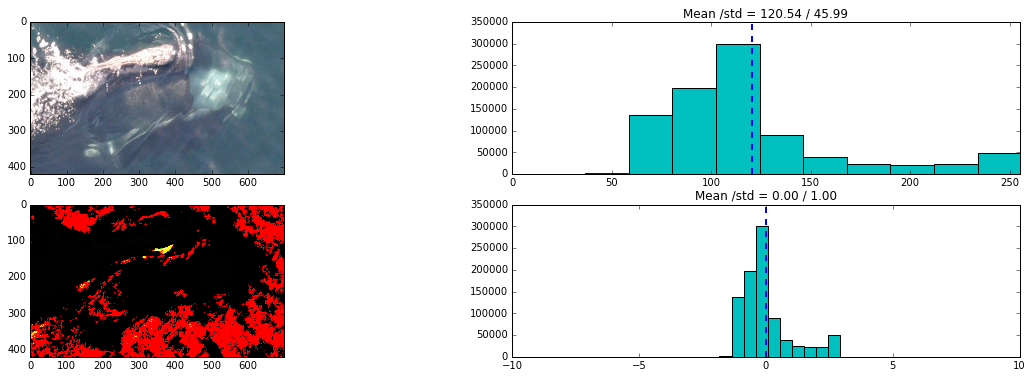

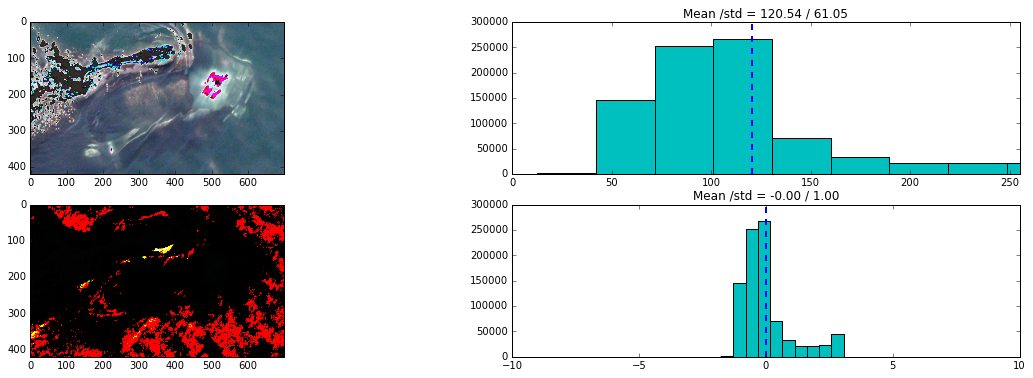

In [52]:
x = tf.placeholder(tf.float32,shape=[h,w,c])
#illuminateX = tf.image.random_brightness(x,20.0)
illuminateX = tf.image.random_contrast(x,lower=0.6, upper=1.4)
normalize = tf.image.per_image_whitening(illuminateX)
with tf.Session() as sess:
    for i in range(10):
        out1, out2 = sess.run([normalize,illuminateX],feed_dict={x:img})
        
        
                
        plt.subplot(221)
        plt.imshow(out2.astype(np.uint8)); 
        plt.subplot(222)
        plt.hist(out2.flatten(),color='c')
        plt.axvline(out2.mean(), color='b', linestyle='dashed', linewidth=2)
        plt.xlim((0,255))
        plt.title("Mean /std = {0:.2f} / {1:.2f}".format(out2.mean(),out2.std()))
        
        
        plt.subplot(223)
        plt.imshow(out1.astype(np.uint8)); 
        plt.subplot(224)
        plt.hist(out1.flatten(),color='c')
        plt.axvline(out1.mean(), color='b', linestyle='dashed', linewidth=2)
        plt.xlim((-10,10))
        plt.title("Mean /std = {0:.2f} / {1:.2f}".format(out1.mean(),out1.std()))

        
        
        
        plt.show()